<a href="https://colab.research.google.com/github/cepdnaclk/e19-CO544-Bitcoin-Cost-Forecast-System/blob/main/Data_Preprocessing_%26_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data


In [ ]:
# Using yfinance
import yfinance as yf

# Define the ticker simbol for Bitcoin
ticker = 'BTC-USD'

# Get historical market data
hist = yf.Ticker(ticker).history(period="max")

# Print the data
print(hist.head())

                                 Open        High         Low       Close  \
Date                                                                        
2014-09-17 00:00:00+00:00  465.864014  468.174011  452.421997  457.334015   
2014-09-18 00:00:00+00:00  456.859985  456.859985  413.104004  424.440002   
2014-09-19 00:00:00+00:00  424.102997  427.834991  384.532013  394.795990   
2014-09-20 00:00:00+00:00  394.673004  423.295990  389.882996  408.903992   
2014-09-21 00:00:00+00:00  408.084991  412.425995  393.181000  398.821014   

                             Volume  Dividends  Stock Splits  
Date                                                          
2014-09-17 00:00:00+00:00  21056800        0.0           0.0  
2014-09-18 00:00:00+00:00  34483200        0.0           0.0  
2014-09-19 00:00:00+00:00  37919700        0.0           0.0  
2014-09-20 00:00:00+00:00  36863600        0.0           0.0  
2014-09-21 00:00:00+00:00  26580100        0.0           0.0  


# Data Preprocessing

## Import Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Get the summary

In [ ]:
hist.info()
print(hist.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3502 entries, 2014-09-17 00:00:00+00:00 to 2024-04-19 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3502 non-null   float64
 1   High          3502 non-null   float64
 2   Low           3502 non-null   float64
 3   Close         3502 non-null   float64
 4   Volume        3502 non-null   int64  
 5   Dividends     3502 non-null   float64
 6   Stock Splits  3502 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 218.9 KB
               Open          High           Low         Close        Volume  \
count   3502.000000   3502.000000   3502.000000   3502.000000  3.502000e+03   
mean   15849.672417  16220.132504  15452.140453  15865.475608  1.711698e+10   
std    17571.619160  17992.914647  17101.533132  17583.151725  1.929038e+10   
min      176.897003    211.731003    171.509995    178.102997  5.914570e+06   
25%     1006

## Create Dependant and Independant Variable Vectors

In [ ]:
# independant variable vector
x = hist.iloc[:,:-2].drop(columns=['Close']).values

# dependant variable vector
y = hist.iloc[:,-4].values

print(x)
print(y)

[[4.65864014e+02 4.68174011e+02 4.52421997e+02 2.10568000e+07]
 [4.56859985e+02 4.56859985e+02 4.13104004e+02 3.44832000e+07]
 [4.24102997e+02 4.27834991e+02 3.84532013e+02 3.79197000e+07]
 ...
 [6.34192969e+04 6.43556680e+04 6.17164023e+04 4.28475281e+10]
 [6.38318477e+04 6.44863633e+04 5.97685859e+04 4.19152470e+10]
 [6.35097695e+04 6.35097695e+04 5.96985078e+04 4.38568960e+10]]
[  457.33401489   424.44000244   394.79598999 ... 63811.86328125
 61276.69140625 62432.26171875]


## Handle Missing Data

In [ ]:
# Count the number of missing values in each column
print(hist.isnull().sum())

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


# Exploratory Data Analysis

## Time Series Plots

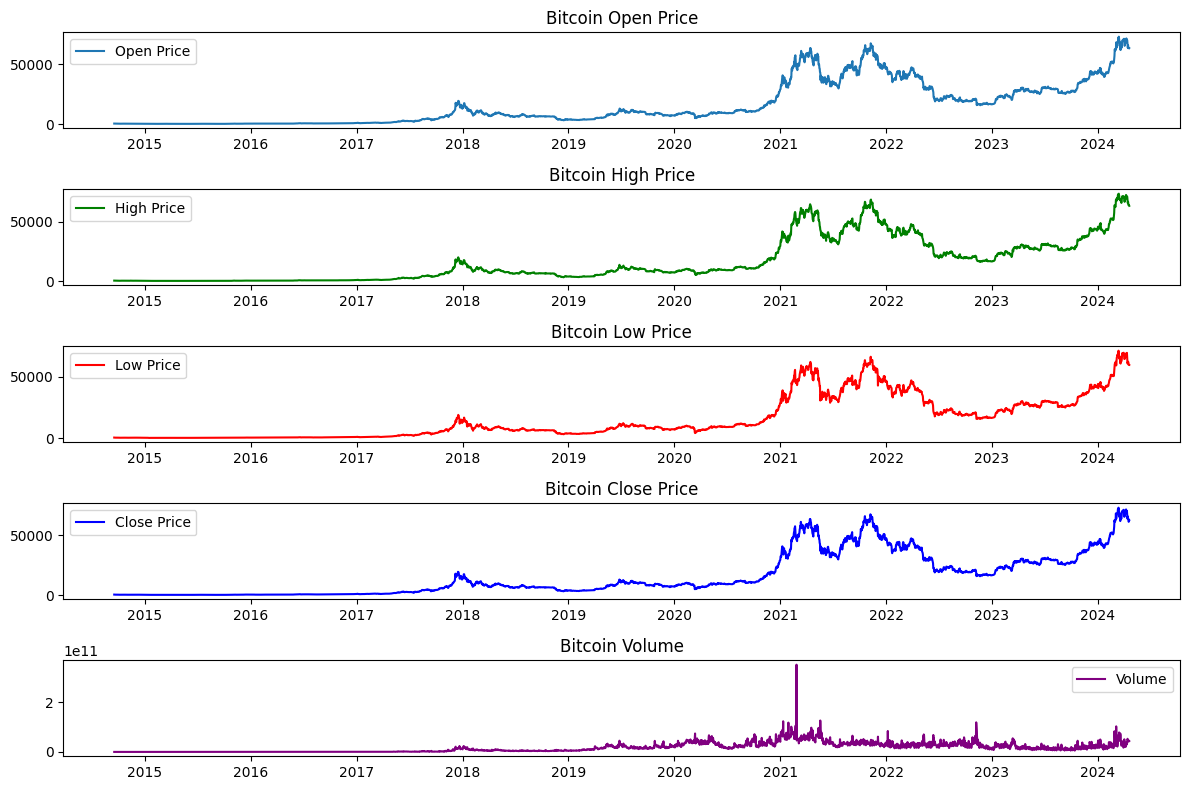

In [ ]:
# Plotting the data
plt.figure(figsize=(12, 8))

# Subplot for 'Open' prices
plt.subplot(511)
plt.plot(hist['Open'], label='Open Price')
plt.title('Bitcoin Open Price')
plt.legend()

# Adjust the space
plt.subplots_adjust(hspace=1)

# Subplot for 'High' prices
plt.subplot(512)
plt.plot(hist['High'], label='High Price', color='green')
plt.title('Bitcoin High Price')
plt.legend()

# Adjust the space
plt.subplots_adjust(hspace=1)

# Subplot for 'Low' prices
plt.subplot(513)
plt.plot(hist['Low'], label='Low Price', color='red')
plt.title('Bitcoin Low Price')
plt.legend()

# Adjust the space
plt.subplots_adjust(hspace=1)

# Subplot for 'Close' prices
plt.subplot(514)
plt.plot(hist['Close'], label='Close Price', color='blue')
plt.title('Bitcoin Close Price')
plt.legend()

# Adjust the space
plt.subplots_adjust(hspace=1)

# Subplot for 'Volume'
plt.subplot(515)
plt.plot(hist['Volume'], label='Volume', color='purple')
plt.title('Bitcoin Volume')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

## Histograms

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>],
       [<Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Dividends'}>],
       [<Axes: title={'center': 'Stock Splits'}>, <Axes: >, <Axes: >]],
      dtype=object)

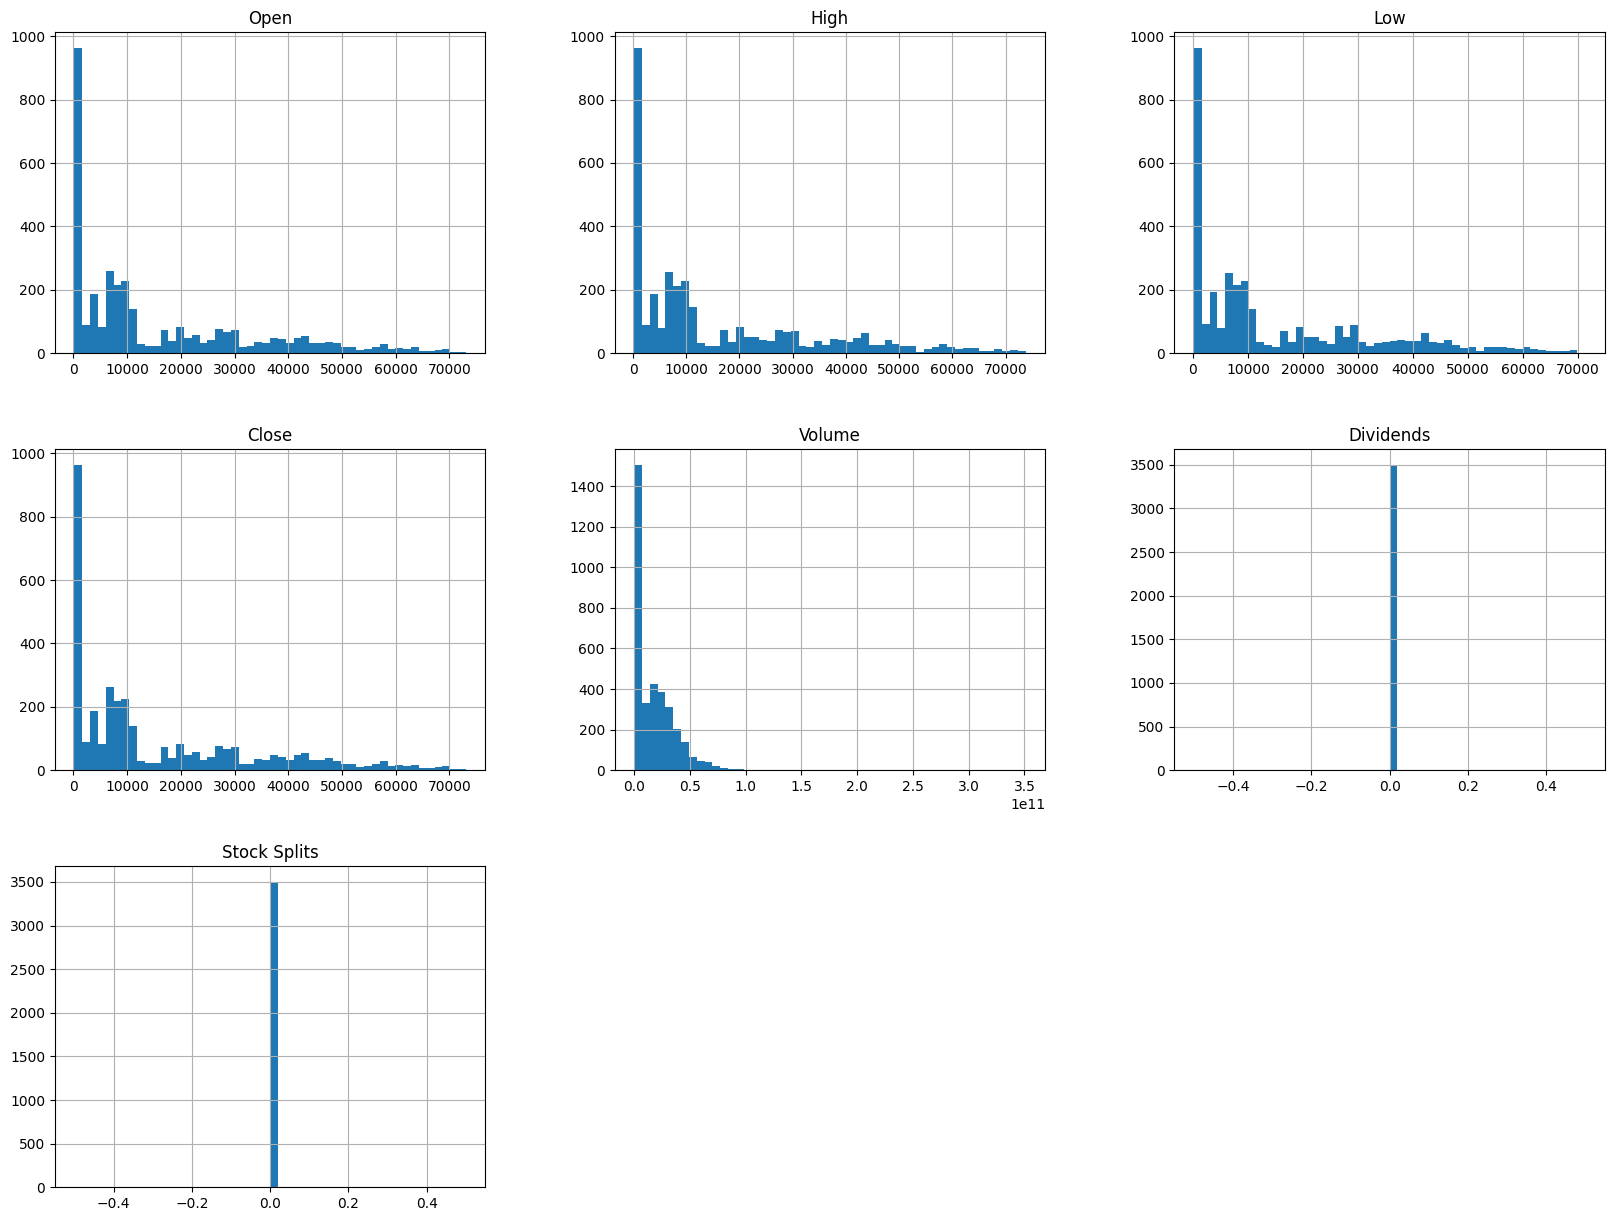

In [ ]:
hist.hist(bins=50, figsize=(20,15))

## Scatter Plots

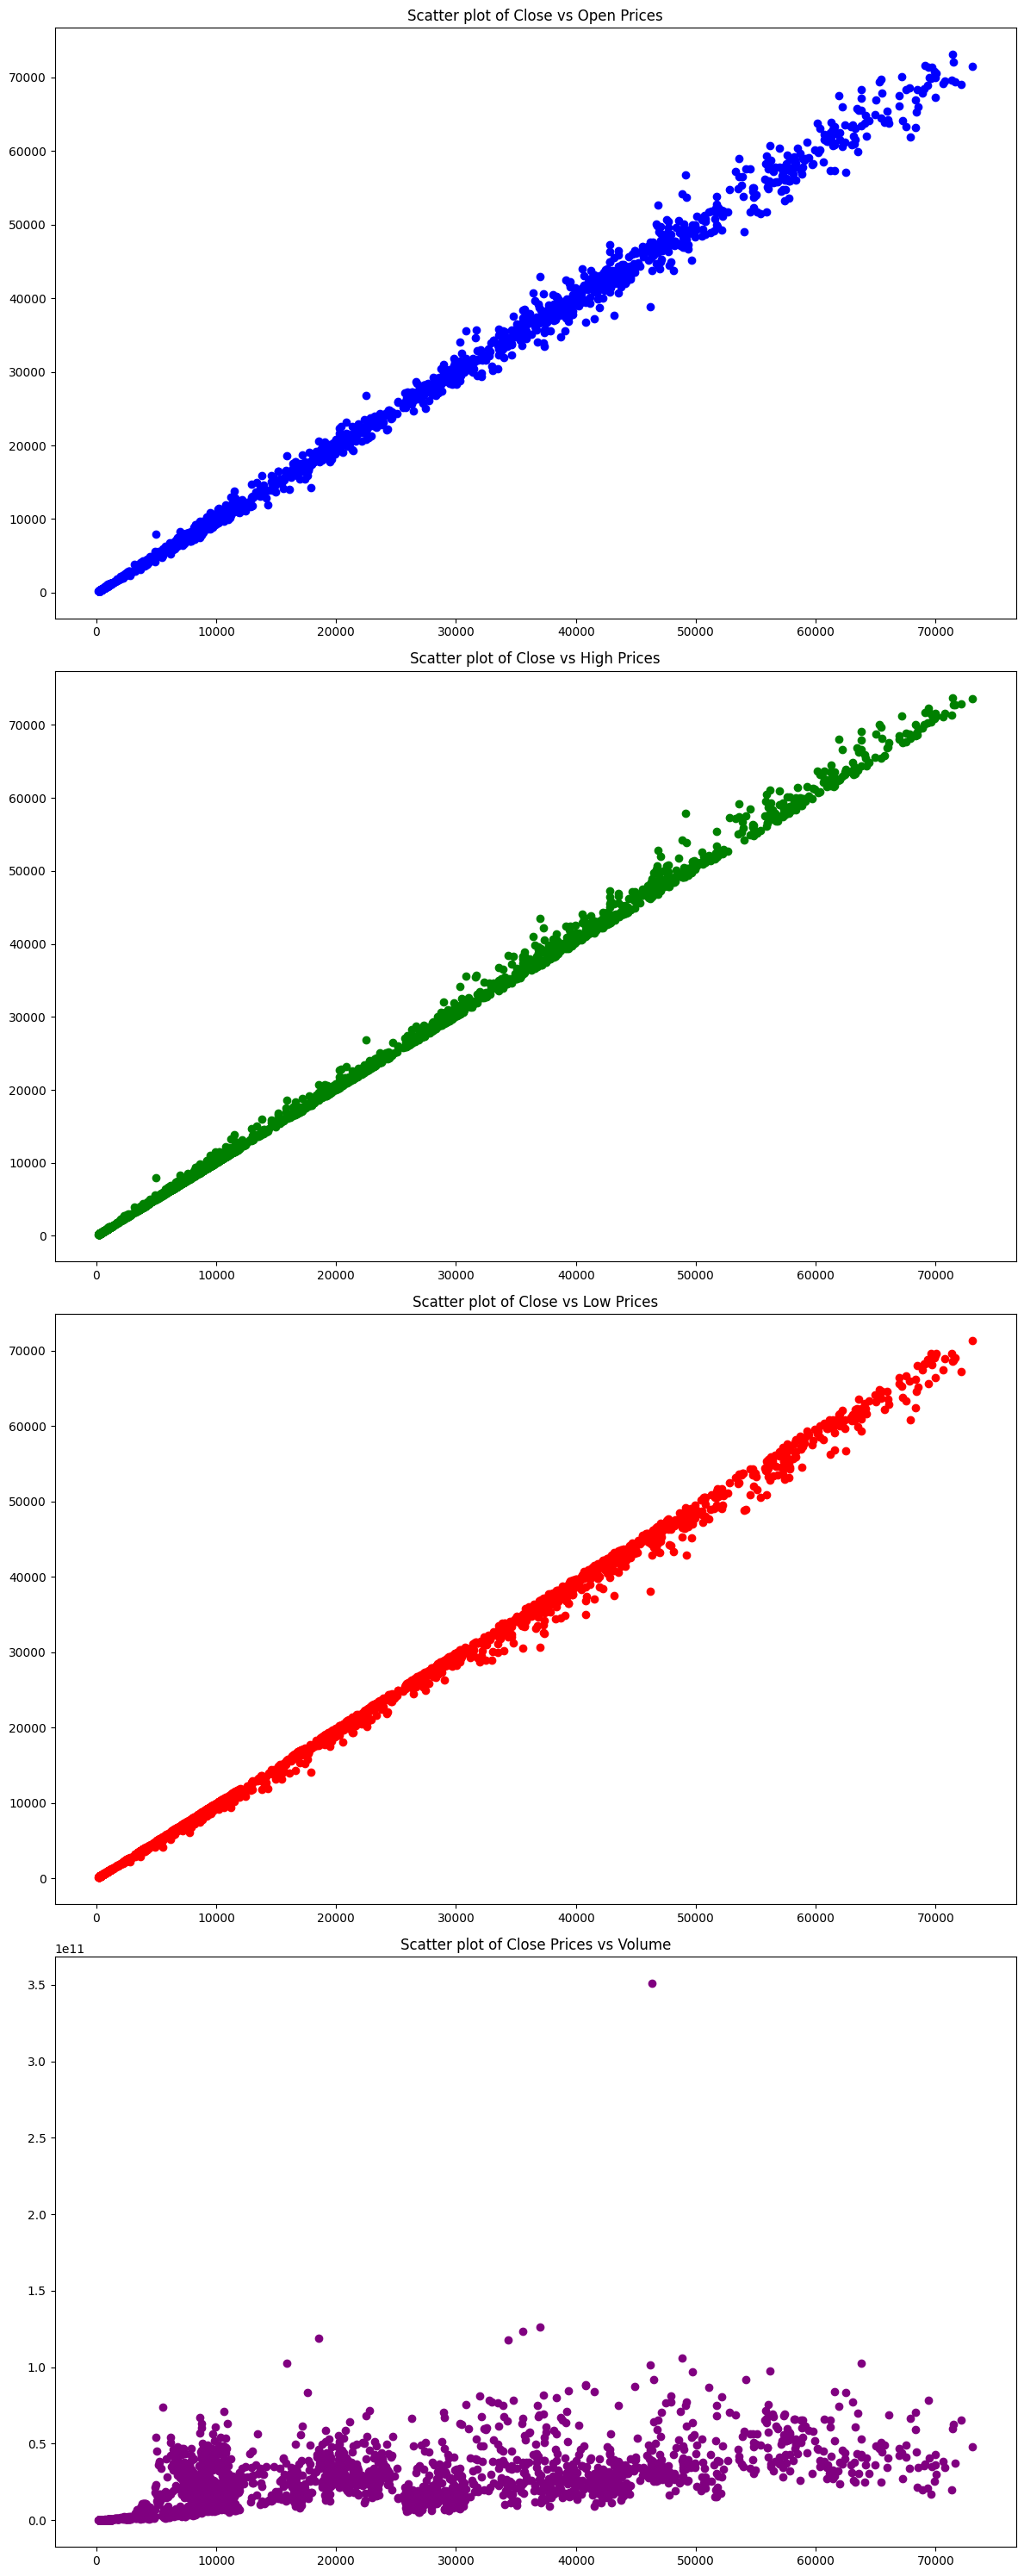

In [ ]:
# Plotting the data
plt.figure(figsize=(12,30))

# Subplot for 'Close' vs 'Open' prices
plt.subplot(411)
plt.scatter(hist['Close'], hist['Open'], color='blue')
plt.title('Scatter plot of Close vs Open Prices')

# Subplot for 'Close' vs 'High' prices
plt.subplot(412)
plt.scatter(hist['Close'], hist['High'], color='green')
plt.title('Scatter plot of Close vs High Prices')

# Subplot for 'Close' vs 'Low' prices
plt.subplot(413)
plt.scatter(hist['Close'], hist['Low'], color='red')
plt.title('Scatter plot of Close vs Low Prices')

# Subplot for 'Close' vs 'Volume'
plt.subplot(414)
plt.scatter(hist['Close'], hist['Volume'], color='purple')
plt.title('Scatter plot of Close Prices vs Volume')

# Display the plot
plt.tight_layout()
plt.show()


## Heat Maps & Correlations

Close           1.000000
High            0.999500
Low             0.999403
Open            0.998857
Volume          0.674503
Dividends            NaN
Stock Splits         NaN
Name: Close, dtype: float64


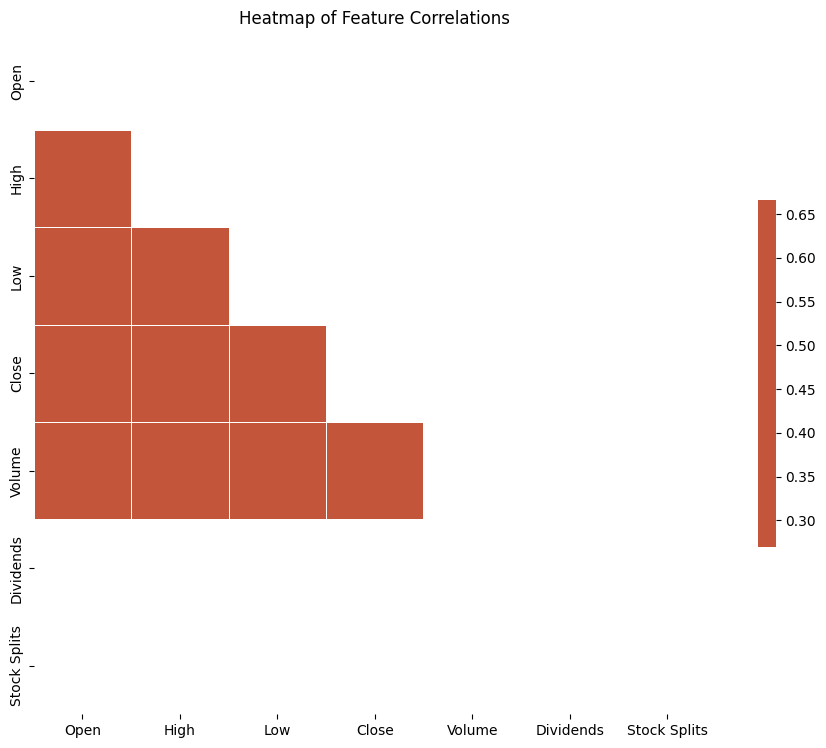

In [ ]:
# import the necessary library
import seaborn as sns

# Calculate the correlation matrix
corr = hist.corr()
print(corr['Close'].sort_values(ascending=False))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Heatmap of Feature Correlations')
plt.show()

## Density Plots

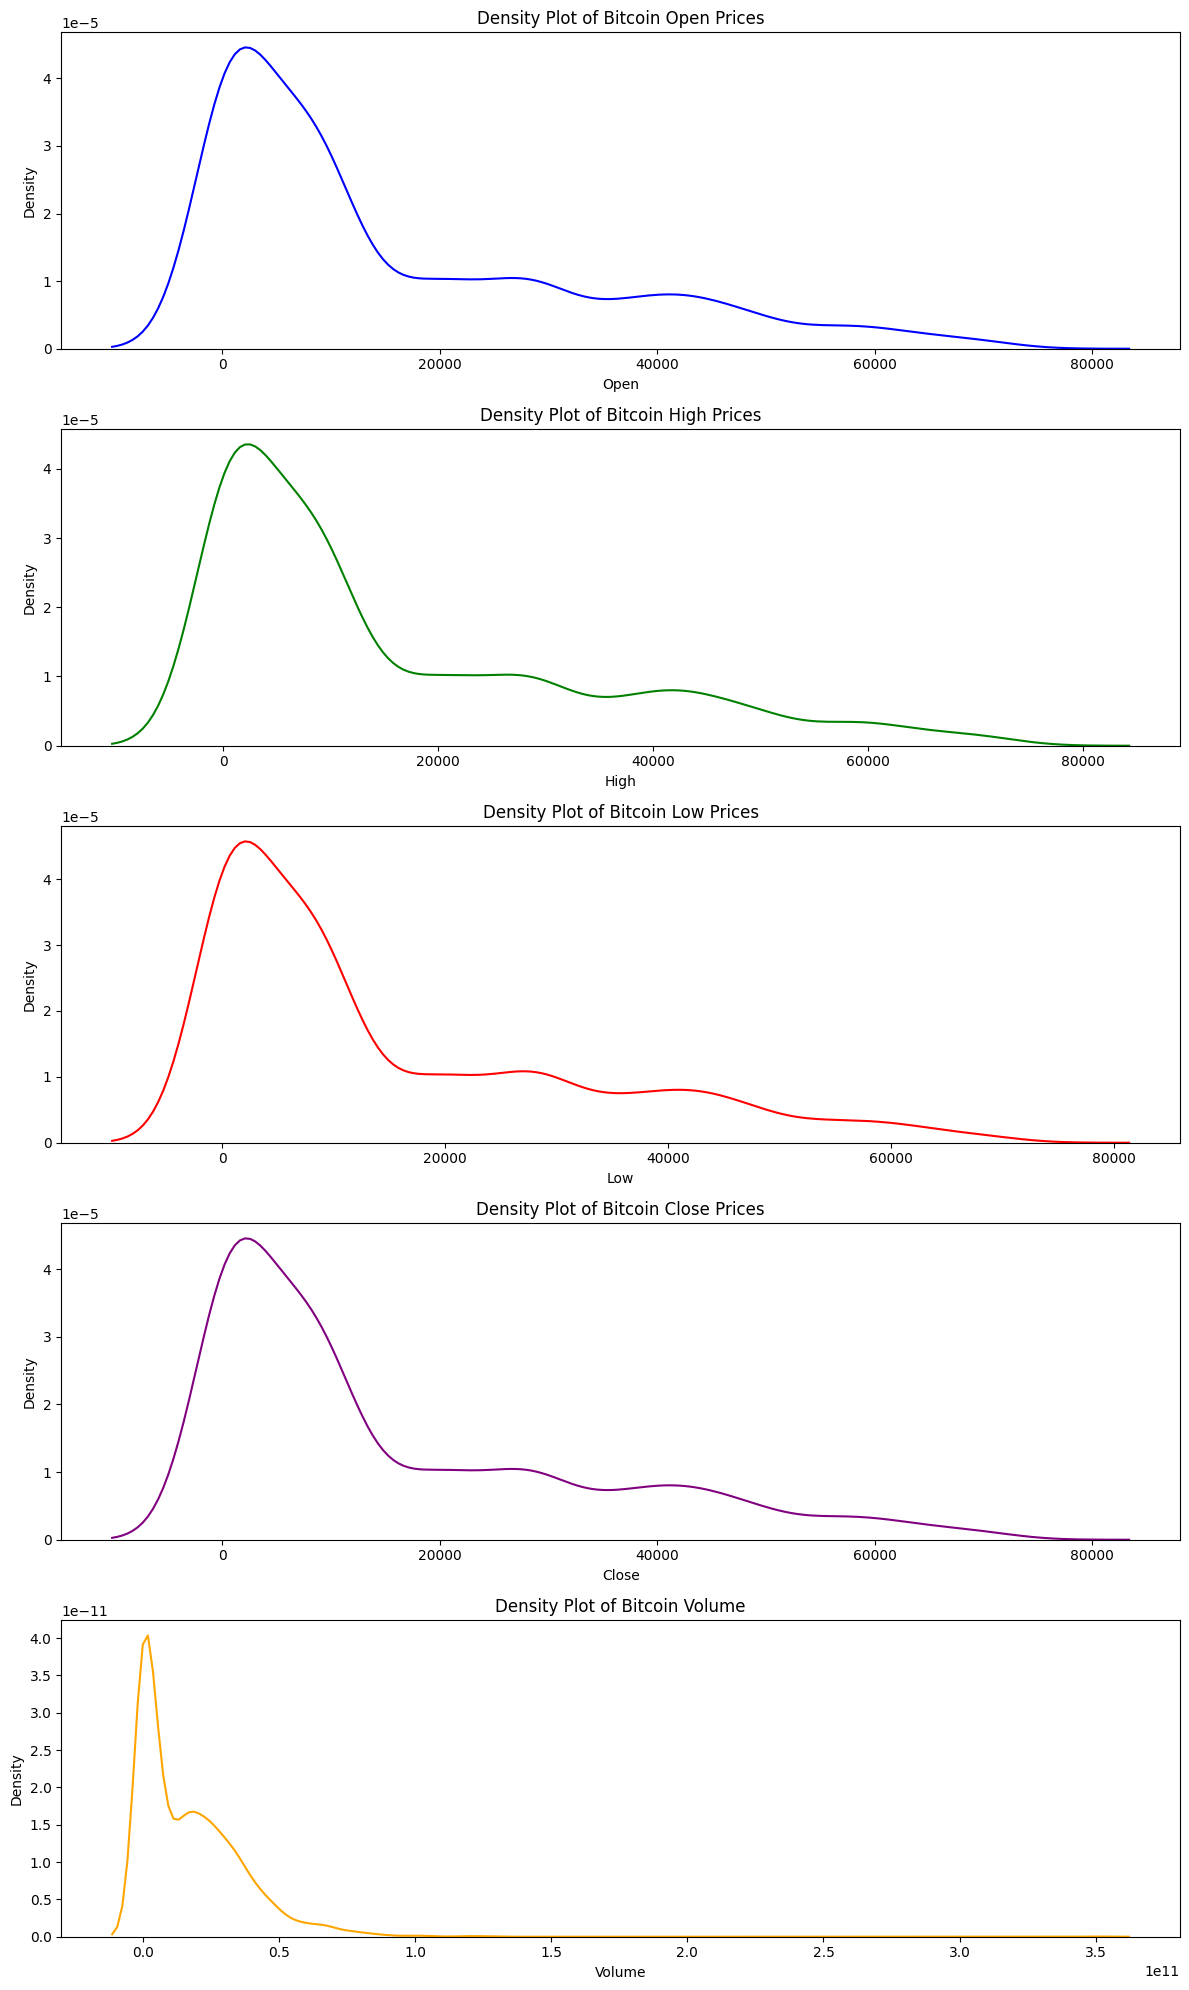

In [ ]:
# Plotting the data
plt.figure(figsize=(12,20))

# Subplot for 'Open' prices
plt.subplot(511)
sns.kdeplot(hist['Open'], color='blue')
plt.title('Density Plot of Bitcoin Open Prices')

# Subplot for 'High' prices
plt.subplot(512)
sns.kdeplot(hist['High'], color='green')
plt.title('Density Plot of Bitcoin High Prices')

# Subplot for 'Low' prices
plt.subplot(513)
sns.kdeplot(hist['Low'], color='red')
plt.title('Density Plot of Bitcoin Low Prices')

# Subplot for 'Close' prices
plt.subplot(514)
sns.kdeplot(hist['Close'], color='purple')
plt.title('Density Plot of Bitcoin Close Prices')

# Subplot for 'Volume'
plt.subplot(515)
sns.kdeplot(hist['Volume'], color='orange')
plt.title('Density Plot of Bitcoin Volume')

# Display the plot
plt.tight_layout()
plt.show()

## Pair Plots

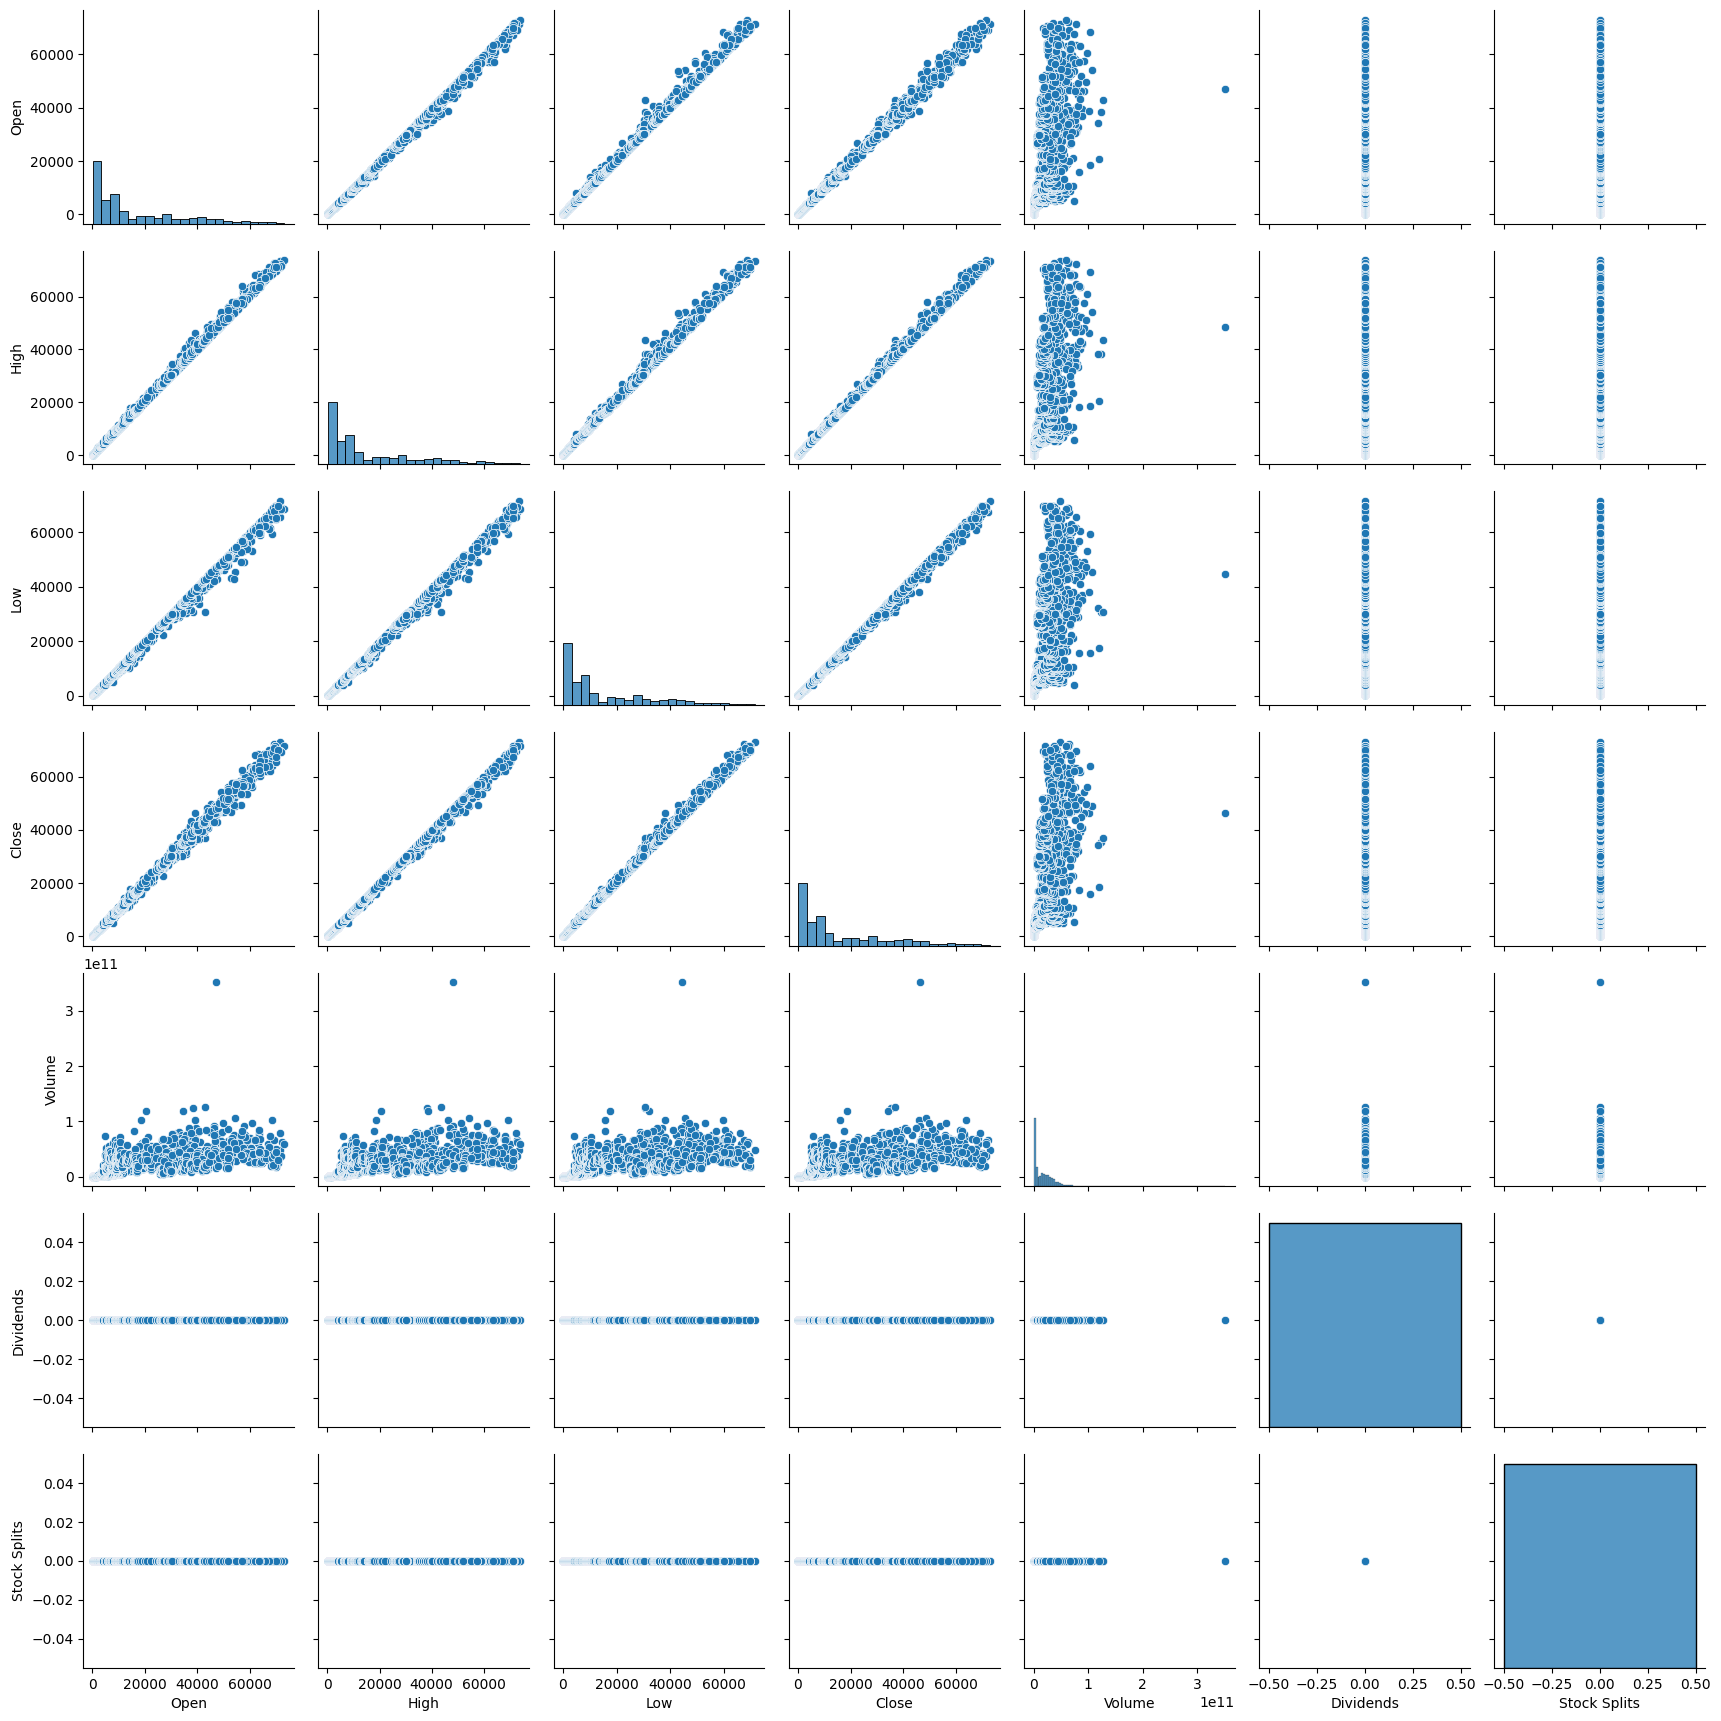

In [ ]:
# Plot pairwise relations in the dataset
sns.pairplot(hist)